# Small examples of bimodule approximation.
This notebook provide a few examples of simple bimodule with explainations. <br>
Note that "in a real usecase", simplextrees are generated by datasets and are much bigger than these ones.

## Setup

In [1]:
# %reload_ext autoreload
# %load_ext autoreload
# %autoreload 2

If you haven't installed the python library, you can compile it and install if via pip using the following command :


In [2]:
# !pip install --user custom_vineyards/

In [3]:
import matplotlib.pyplot as plt  # plots for python
from approx import *             # deprecated python functions to smooth intervals
import numpy as np               # to have usable math functions in python 
import random                    # generate elementary random numbeers
# from multipers import *          # set of multipersistence module functions. It can rely on dionysus or mma.
from mma import *                # python bindings of module approximation c++ functions.

## Small examples

### Toy example

Filtration dimension : 2
Number of simplices : 6
Precision : 0.9
Number of lines : 5
Creating matrix ... Done !
Initializing barcode... Done ! It took 4e-06 seconds.
Multithreading status : 0
Starting recursive vineyard loop... Done ! It took 7e-06 seconds.
Cleaning output ... Completing output ... Done ! It took 2.375e-06 seconds.


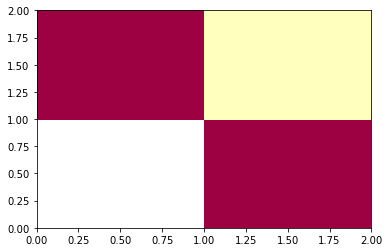

In [4]:
# Generates a small bimodule from a simplextree (see Gudhi's documentation).
simplextree = gd.SimplexTree()
simplextree.insert([0,3])
simplextree.insert([1,3])
simplextree.insert([2])
# Sets filtration values to each node. Format : [Filtration 1, Filtration 2 , ..., Filtration n]. Here n=2.
filters = [[0,1,1,1],[1,0,1,1]]

# Defines on which rectangle to plot. Format : [x,y], where x,y defines the rectangle {z : x ≤ z ≤ y}. 
# If not specified, the algorithms will try to find a good plot window.
box = [[0,0],[2,2]]

# Precision controls the bottleneck distance of the approximation. 
#    - A too low value implies a too high computational cost,
#    - A too high value can result in a bad approximation.
precision = 0.9

# Plots an approximation of the module defined by the 2-persistence homology of the chain complex generated by simplextree and its filtration values. 
plot_approx_2d(simplextree, filters, precision, box, dimension=0, verbose=1) # dimension is the persistent homology dimension plotted. Defaults to 0.
# Note that in that example the approximation is exact if precision < 1.


## Convergence of the approximation

### Band example

As above, we generate a 2-persistence module, and compute an approximation. The approximation is computed using the information as `plot_vine_2d`.

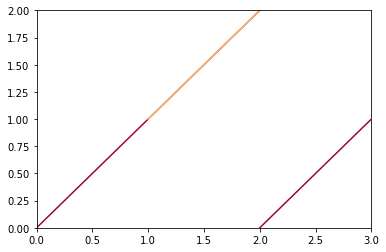

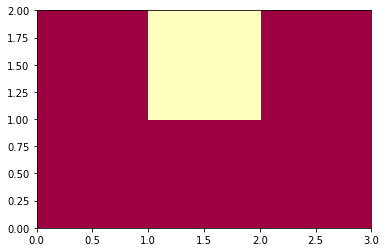

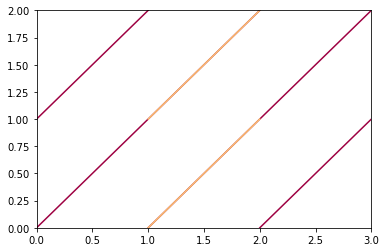

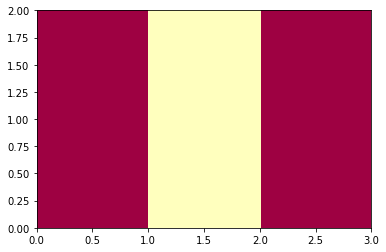

In [5]:
# Generates a 2-persistence module
simplextree = gd.SimplexTree()
simplextree.insert([0,1])
simplextree.insert([1,2])
F1 = np.array([0,2,1])
F2 = np.array([0,0,0])

# Computes an approximation for precision = 2 and precision = 1. The approximation is exact here if precision < 
# The plot_vine_2d plots matched barcodes along slope 1 lines.
plot_vine_2d  (simplextree, [F1,F2], precision = 2, box = [[0,0],[3,2]])
plot_approx_2d(simplextree, [F1,F2], precision = 2, box = [[0,0],[3,2]])
plot_vine_2d  (simplextree, [F1,F2], precision = 1, box = [[0,0],[3,2]])
plot_approx_2d(simplextree, [F1,F2], precision = 1, box = [[0,0],[3,2]])

### Two examples having the same pointwise dimension.

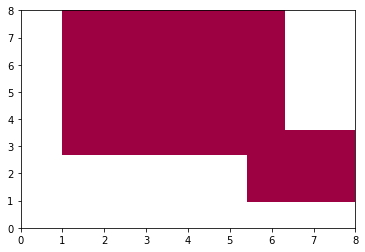

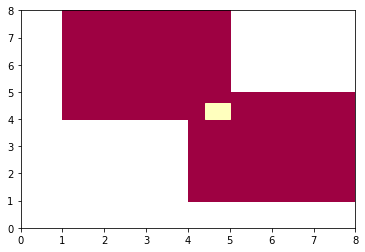

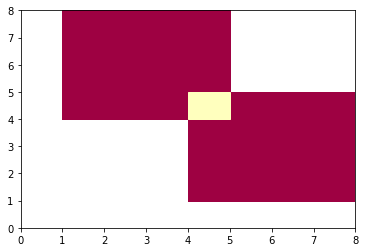

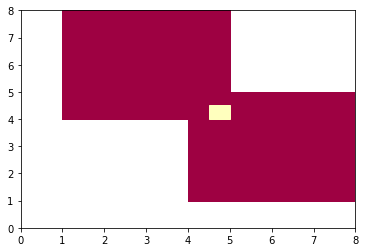

0.32097731371338023


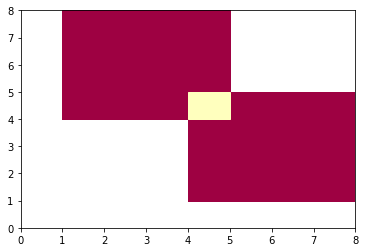

In [6]:
s = gd.SimplexTree()
s.insert([0,1,4])
s.insert([0,3,4])
s.insert([1,3,4])
s.insert([0,2,5])
s.insert([0,3,5])
s.insert([1,2,5])
s.insert([1,3,5])
s.insert([6,7,9])
s.insert([6,8,9])
s.insert([7,8,9])
s.insert([6,7,10])
s.insert([6,8,10])
s.insert([7,8,10])
F1 = np.array([1,1,1,4,5,4,4,4,4,4,5])
F2 = np.array([1,1,4,1,5,4,4,4,4,5,4])
filters = np.hstack([F1[:,np.newaxis], F2[:,np.newaxis]])


# no line crosses the small yellow module here, so none is plotted. 
# The approximation algorithm knows that this summand exists, but it doesn't know where to put it.
plot_approx_2d(s, filters, 3.1, [[0,0],[8,8]], dimension=1) 

# In that case the big red module is recovered, but not the yellow module
plot_approx_2d(s, filters, 2.1, [[0,0],[8,8]], dimension=1) 

# Here we only need a precision of 2 to recover the entire module !
plot_approx_2d(s, filters, 2, [[0,0],[8,8]], dimension=1) 

# It's not because a bigger precision can recover the module that a smaller one can.
# But there are theorical guarantees :
#     - the bottleneck (and thus interleaving) distance is controlled by the precision.
#     - we know that the red interval summand is exactly recovered for a precision < 2
#             and the yellow interval summand is exactly recovered for a precision < 1.
#     See the original paper for details.
plot_approx_2d(s, filters, 1.7, [[0,0],[8,8]], dimension=1)

# you can check that the yellow interval summand is always recovered if 0 ≤ precision ≤ 1.
precision = max(random.random(),0.001)
print(precision)
plot_approx_2d(s, filters, precision, [[0,0],[8,8]], dimension=1)


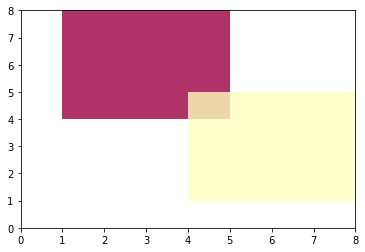

In [7]:
s = gd.SimplexTree()
#cycle 1
s.insert([0,1,3])
s.insert([0,2,3])
s.insert([1,2,3])
#cycle 2
s.insert([4,5,7])
s.insert([5,6,7])
s.insert([4,6,7])
filters = [[1,1,1,5,4,4,4,4], [4,4,4,4,1,1,1,5]]

plot_approx_2d(s, filters, precision = 1, box = [[0,0],[8,8]], dimension = 1, alpha = 0.8)


## A non-(interval-decomposable) module.
Even if the module is **not** interval-decomposable, the algorithm will still return a persistence module, but we don't have a theorical result on its closeness (for instance wrt the interleaving distance) to the real module. <br>
We consider the follwing chain complex.

In [8]:
#         5
#       / | \
#      /  4  \
#     / / | \ \
#   1 --- 2 --- 3
#     \   |   /
#      \  |  /
#       \ | /
#         0     

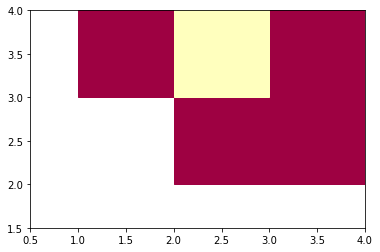

In [9]:
# Generates a complex chain whose 2-persistence is an indecomposable module which is not an indicator module.
simplextree = gd.SimplexTree()
simplextree.insert([0])
simplextree.insert([1])
simplextree.insert([2])
simplextree.insert([3])
simplextree.insert([4])
simplextree.insert([5])
simplextree.insert([0, 1])
simplextree.insert([0, 3])
simplextree.insert([1, 2])
simplextree.insert([2, 3])
simplextree.insert([2, 4])
simplextree.insert([1, 4])
simplextree.insert([3, 4])
simplextree.insert([1, 5])
simplextree.insert([3, 5])
simplextree.insert([4, 5])
simplextree.insert([1, 2, 4])
simplextree.insert([2, 3, 4])
simplextree.insert([1, 4, 5])
simplextree.insert([3, 4, 5])

# If the filtration is not complete, eg. only specified on points, the approx algorithm will automatically complete it as a lowerstar n-filtration.
filtration = np.array([[1, 1],[1, 2],[2, 2],[1, 2],[3, 2.5],[1, 3]])

# An interval decomposable approximation of an indecomposable module. Note that it will be the same approximation for any precision < 1.
plot_approx_2d(simplextree, filtration, precision = 0.9, box = [[0.5,1.5],[4,4]], dimension=1)